In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split

a) Ao realizar a regressão linear no dataset de Advertising, podemos perceber que ao fazer análise dos atributos de meio de venda (televisão, rádio e jornal), a televisão se saiu sendo o meio mais influente entre os três. Explico:

### Televisão
- Coeficiente $\beta_{1}$: 0.0475 → Cada unidade de dinheiro investida em televisão está associada ao aumento de 0.0475 unidades em vendas.
- $R^{2}$ = 0.0612 → Aproximadamente 61,2% da variação dos dados analisados de todas as vendas estão atrelados pelo investimento dos advertisings em televisão.
- p-valor < 0.001 → Um bom indíce para nos dizer que a relação entre televisão e vendas é estatisticamente significativo.


### Rádio
- Coeficiente $\beta_{1}$: 0.2025 → Investir em rádio faz com que o aumento seja em média de 0.2025 unidades em vendas.
- $R^{2}$ = 0.332 → Aproximadamente 33,2% da variação dos dados analisados estão atrelados pelo investimento em rádio.
- p-valor < 0.001 → Novamente, um bom indíce para nos dizer que essa relação estatisticamente é significativa para nossa análise.

### Jornal
- Coeficiente $\beta_{1}$: 0.0547 → Investir em jornal traz um impacto pequeno mas positivo em vendas, quando comparado com os anteriores.
- $R^{2}$ = 0.052 → Apenas 5,2% dos dados são explicados pela venda em jornal.
- p-valor = 0.00115 → Impacto prático muito baixo na análise


A conclusão que podemos fazer é que os três atributos são estatisticamente significativos para construir o nosso modelo, entretanto, a TV é o método mais eficaz de vendas enquanto a venda através de jornais é a menos efetiva e com pouca capacidade preditiva ao analisar as vendas.

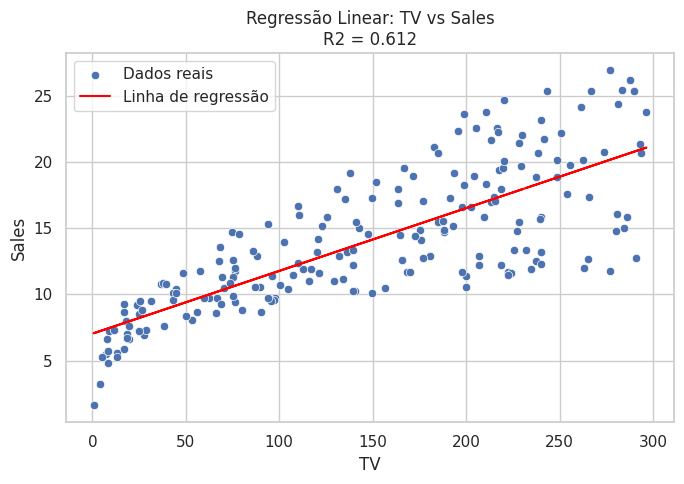


Resumo da Regressão para TV:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        16:36:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326

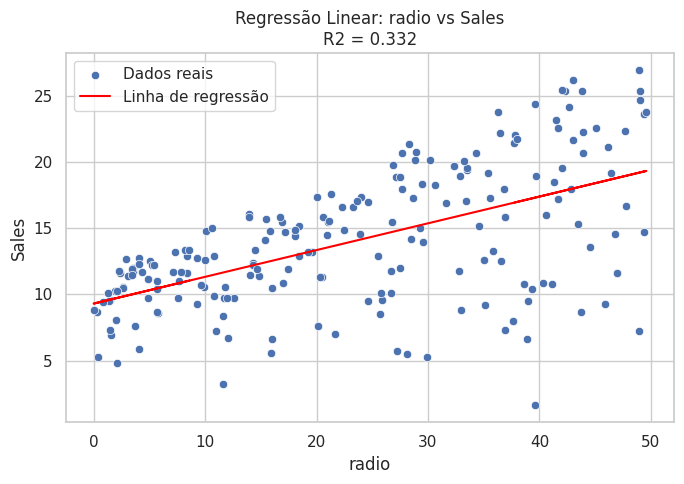


Resumo da Regressão para radio:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           4.35e-19
Time:                        16:36:02   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3

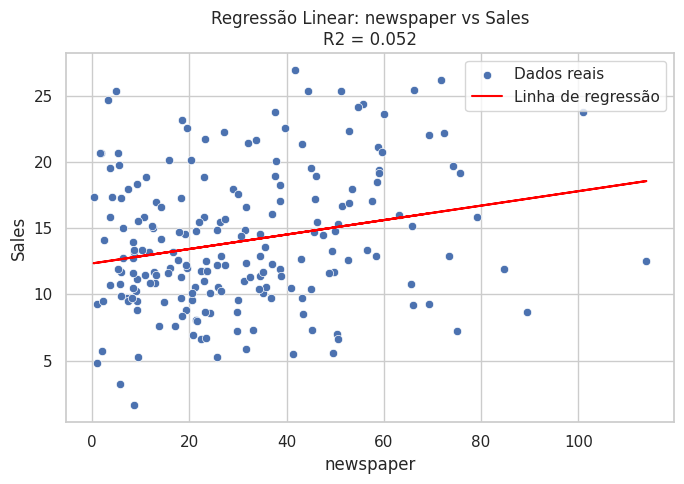


Resumo da Regressão para newspaper:

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 29 Apr 2025   Prob (F-statistic):            0.00115
Time:                        16:36:02   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [ ]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'

df = pd.read_csv(url, index_col=0)

features = ['TV', 'radio', 'newspaper']

sns.set(style="whitegrid")

for feature in features:
  X = df[[feature]]
  y = df['sales']

  X_const = sm.add_constant(X)

  model = sm.OLS(y, X_const).fit()

  y_pred = model.predict(X_const)

  plt.figure(figsize=(7, 5))
  sns.scatterplot(x=df[feature], y=y, label='Dados reais')
  plt.plot(df[feature], y_pred, color='red', label='Linha de regressão')
  plt.title(f'Regressão Linear: {feature} vs Sales\nR2 = {model.rsquared:.3f}')
  plt.xlabel(feature)
  plt.ylabel('Sales')
  plt.legend()
  plt.tight_layout()
  plt.show()

  print(f"\nResumo da Regressão para {feature}:\n")
  print(model.summary())

b) Aqui podemos entender melhor a estatística entre os gastos em TV, rádio e jornal.

Olhando por cada variável, temos:

### Vendas pela TV
- Correlação alta ($\approx$ 0,9 para Pearson e Spearman)
- p-valor muito baixo ($\approx 10^{-74}$ $\rightarrow$ significativo)

A hipótese nula $H_{0}$ de que não há correlação é claramente rejeitada nesse caso, isto é, a venda por televisão é bastante significativo nas vendas.

### Vendas por rádio
- Correlação média ($\approx$ 0,35 para ambos os dois)
- p-valor baixo ($\approx 10^{-7}$ $\rightarrow$ significativo)

embora a correlação seja mais fraca do que a anterior pela TV, ainda assim a hipótese nula $H_{0}$ é rejeitada.


### Vendas por jornal
- Correlação baixa (0,158 para Pearson e 0,123 para Spearman)
- p-valores em contradição:
  - Pearson: $\approx$ 0,025 (significativo ao nível dos 5%)
  - Spearman: $\approx$ 0,082 (não significativo ao nível dos 5%)

portanto, podemos dizer que não há evidência robusta o suficiente para afirmar que o jornal influencia nas vendas, não rejeitando a hipótese com segurança.

In [ ]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv"
df = pd.read_csv(url)

print("\n--- Matriz de Correlação (Pearson) ---")
corr_pearson = df.corr(method='pearson')

display(corr_pearson.style.background_gradient(cmap='coolwarm',
axis=None))
print("\n--- Matriz de Correlação (Spearman) ---")
corr_spearman = df.corr(method='spearman')
display(corr_spearman.style.background_gradient(cmap='coolwarm',
axis=None))

print("\n--- Comparação com Scipy (Pearsonr e Spearmanr) ---")
attributes = df.columns[:-1]
target = 'Sales'

for attr in attributes:
  pearson_r, pearson_p = pearsonr(df[attr], df[target])
  spearman_r, spearman_p = spearmanr(df[attr], df[target])

  print(f"\n**{attr} vs {target}**")
  print(f"Pearson: r = {pearson_r:.3f}, p-valor = {pearson_p:.3e}")
  print(f"Spearman: r = {spearman_r:.3f}, p-valor = {spearman_p:.3e}")


--- Matriz de Correlação (Pearson) ---


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000



--- Matriz de Correlação (Spearman) ---


,TV,Radio,Newspaper,Sales
TV,1.000000,0.056123,0.050840,0.900996
Radio,0.056123,1.000000,0.316979,0.339949
Newspaper,0.050840,0.316979,1.000000,0.123027
Sales,0.900996,0.339949,0.123027,1.000000



--- Comparação com Scipy (Pearsonr e Spearmanr) ---

**TV vs Sales**
Pearson: r = 0.901, p-valor = 7.928e-74
Spearman: r = 0.901, p-valor = 9.699e-74

**Radio vs Sales**
Pearson: r = 0.350, p-valor = 3.883e-07
Spearman: r = 0.340, p-valor = 8.439e-07

**Newspaper vs Sales**
Pearson: r = 0.158, p-valor = 2.549e-02
Spearman: r = 0.123, p-valor = 8.264e-02


c) O resultado da saída do pairplot permite visualizar as relações entre pares de variáveis numéricas. É útil para detectar padrões.

As saídas gráficas nos dá que na diagonal teremos histogramas da distribuição de cada uma das variáveis: TV, rádio, jornal e vendas:

**Televisão** → Distribuição relativamente uniforme.

**Rádio e jornais** → Distribuições mais voltadas para valores menores.

**Vendas** → Possui uma distribuição assimétrica bicaudal.

-----

Ignorando a diagonal, podemos interpretar:

**Vendas pela TV** → relação fortemente linear e positiva, os dados estão cada vez mais crescentes positivamente, podendo nos sugerir permanecer com os investimentos na TV.

**Vendas pelo rádio** → Podemos fazer a mesma afirmação da televisão, entretanto, os dados estão mais esparsos representando uma relação um pouco mais fraca, que é algo que já vinhamos interpretando de resultados anteriores.

**Vendas pelo jornal** → Os pontos estão bastante espalhados, apresentando nenhum padrão, indicando que há correlação muito baixa entre essas variáveis.

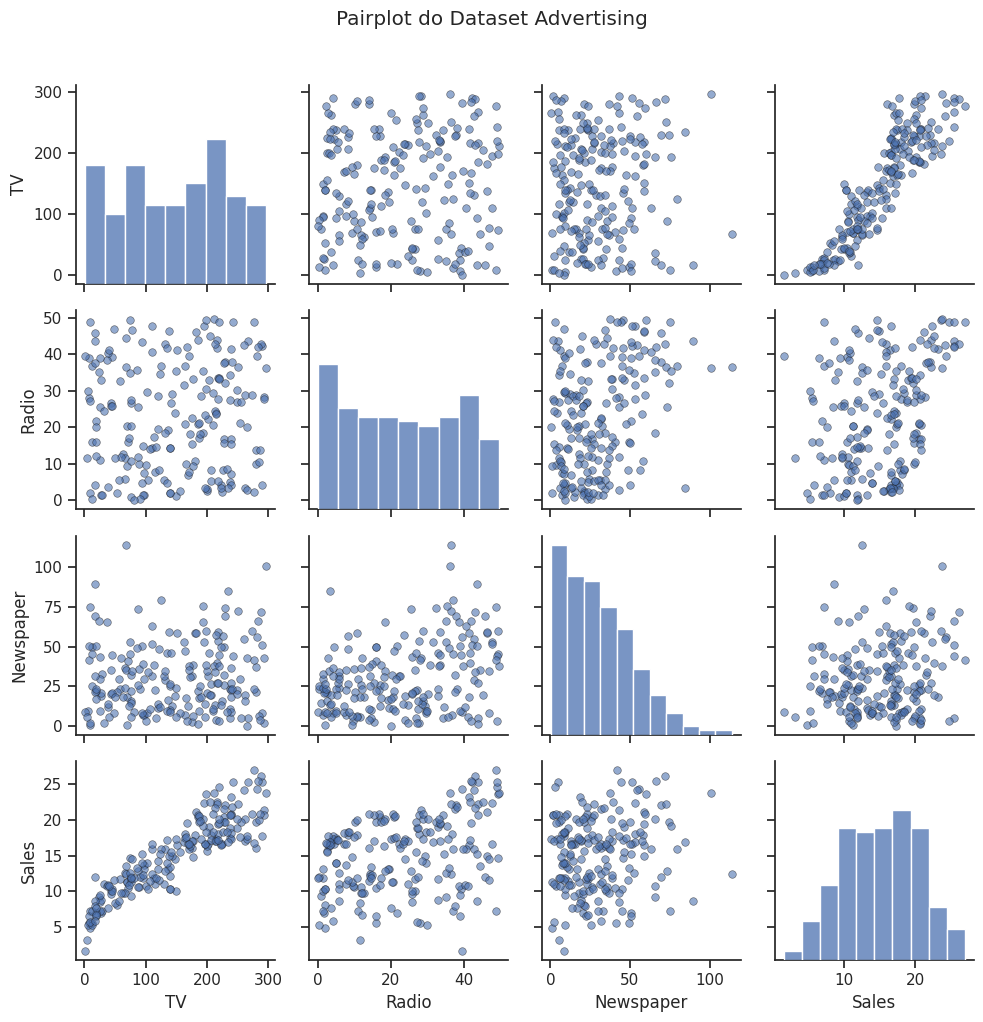

In [3]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv"
df = pd.read_csv(url)

sns.set(style="ticks")
pairplot = sns.pairplot(
    data=df,
    vars=['TV', 'Radio', 'Newspaper', 'Sales'],
    diag_kind='hist',
    plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
    height=2.5)

pairplot.fig.suptitle("Pairplot do Dataset Advertising", y=1.02)
plt.tight_layout()
plt.show()

### d) Análise do resultado do modelo de regressão linear

Com base nas vendas analisadas, fazemos a seleção dos atributos novamente: TV, rádio, realizando 10 splits diferentes nos dados, através da aplicação de uma validação cruzada.

Existe uma baixa colinearidade entre as variáveis selecionadas (corr < 0,47).

Em cada uma das iterações, as features selecionadas foram "TV" e "Rádio" para prever as vendas.


### Algumas métricas importantes analisadas:
$RSS$ (Residual Sum of Squares) → soma dos quadrados dos resíduos (erros).

$RSE$ (Residual Standard Error) → Erro padrão dos resíduos, penaliza modelos com muitas variáveis.

$R^{2}$ ajustado: Indica quão bem o modelo explica a variância dos dados, ajustado pelo número de variáveis.

### Resultados
Pela avaliação que podemos fazer do modelo dado as métricas anteriores como resultado para cada um dos splits, temos que o $R^{2}$ ajustado está entre 0,89 e 0,91, o que é um bom indicador para termos um bom poder preditivo com o nosso modelo utilizando apenas duas variáveis.

Além disso, o $RSE$ variando entre 1,42 e 2,20 mostra que estamos com um baixo erro nas previsões.

E, por fim, o RSS menor dos splits com RSE menor, como esperado, nos mostra que o modelo está fazendo uma boa generalização e não está tendo overfitting.

In [6]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv"
df = pd.read_csv(url)


X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

test_results = {}
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  corr_with_sales = X_train.corrwith(y_train).abs().sort_values(ascending=False)

  corr_matrix = X_train.corr().abs()
  selected_features = []

  for feature in corr_with_sales.index:
    if len(selected_features) < 2:
      if len(selected_features) == 0 or all(corr_matrix.loc[feature, selected] < 0.7 for selected in selected_features):
        selected_features.append(feature)

  X_train_selected = sm.add_constant(X_train[selected_features])
  model = sm.OLS(y_train, X_train_selected).fit()

  X_test_selected = sm.add_constant(X_test[selected_features])
  y_pred = model.predict(X_test_selected)
  residuals = y_test - y_pred
  rss = np.sum(residuals**2)
  rse = np.sqrt(rss / (len(y_test) - len(selected_features) - 1))

  test_results[f"Split_{i+1}"] = {
      'Features': selected_features,
      'RSS_test': rss,
      'RSE_test': rse,
      'R2_test': model.rsquared_adj
  }

print("Resultados nos Conjuntos de Teste:")
for split, data in test_results.items():
  print(f"\n{split}: Features = {data['Features']}")
  print(f" RSS: {data['RSS_test']:.2f}")
  print(f" RSE: {data['RSE_test']:.2f}")
  print(f" R2 ajustado: {data['R2_test']:.4f}")
  print("=" * 50)


Resultados nos Conjuntos de Teste:

Split_1: Features = ['TV', 'Radio']
 RSS: 179.07
 RSE: 2.20
 R2 ajustado: 0.9119

Split_2: Features = ['TV', 'Radio']
 RSS: 96.22
 RSE: 1.61
 R2 ajustado: 0.9043

Split_3: Features = ['TV', 'Radio']
 RSS: 123.06
 RSE: 1.82
 R2 ajustado: 0.9109

Split_4: Features = ['TV', 'Radio']
 RSS: 77.09
 RSE: 1.44
 R2 ajustado: 0.8981

Split_5: Features = ['TV', 'Radio']
 RSS: 80.59
 RSE: 1.48
 R2 ajustado: 0.8980

Split_6: Features = ['TV', 'Radio']
 RSS: 74.82
 RSE: 1.42
 R2 ajustado: 0.8964

Split_7: Features = ['TV', 'Radio']
 RSS: 75.62
 RSE: 1.43
 R2 ajustado: 0.8982

Split_8: Features = ['TV', 'Radio']
 RSS: 86.69
 RSE: 1.53
 R2 ajustado: 0.8930

Split_9: Features = ['TV', 'Radio']
 RSS: 156.71
 RSE: 2.06
 R2 ajustado: 0.9106

Split_10: Features = ['TV', 'Radio']
 RSS: 81.50
 RSE: 1.48
 R2 ajustado: 0.8987


#### e) Comparação com o modelo inicial feito em a)

O resultado do nosso modelo aqui em e) nos deu que a variável newspaper não traz contribuição significativa (pois o seu p-valor é 0.860) e pode ser descartada; o modelo com menos variáveis favorece na generalização, evitando overfitting e o padrão curvo nos resíduos sugere que a relação entre valores previstos e sales não é exatamente linear, limitando o poder da nossa regressão linear.

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.58e-96
Time:                        22:45:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

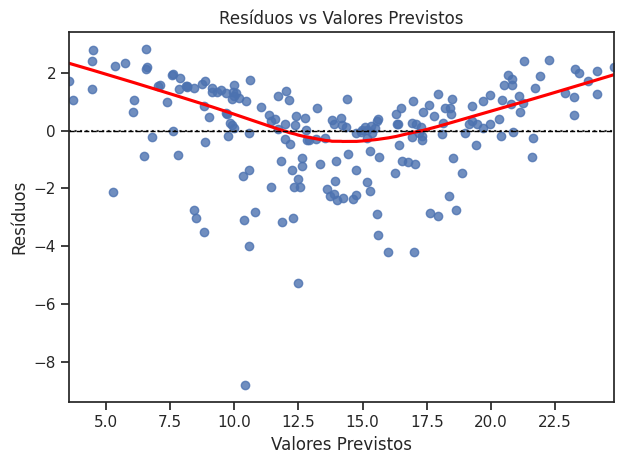

In [7]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url, index_col=0)

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()

y_pred = model.predict(X_const)

print(model.summary())

residuals = y - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':
'red'})
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Previstos')
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.tight_layout()
plt.show()